# Polkolobarji

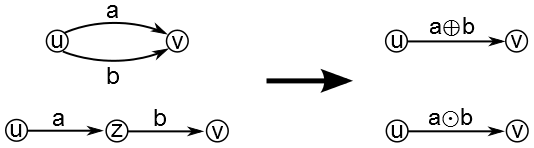

* Gondran, Michel; Minoux, Michel: Graphs, Dioids and Semirings;
New Models and Algorithms. <a href="https://www.springer.com/gp/book/9780387754499">Springer</a>  2008.

* Cerinšek M., Batagelj V. (2017) Semirings and Matrix Analysis of Networks. In: Alhajj R., Rokne J. (eds) Encyclopedia of Social Network Analysis and Mining. <a href="https://link.springer.com/referenceworkentry/10.1007%2F978-1-4614-7163-9_152-1">Springer</a>, New York, NY. https://doi.org/10.1007/978-1-4614-7163-9_152-1

* J. Antonio Rivero Ostoic: Algebraic Analysis of Social Networks: Models, Methods and Applications using R. John Wiley & Sons, 2021. 
ISBN:9781119250388, DOI:10.1002/9781119250425


Knjižnico v jeziku Python za podporo računanju z utežmi sem začel pisati 10. marca 2014. Kasneje se mi je pridružila Selena Praprotnik, ki se je s to tematiko ukvarjala v svojem doktoratu. Leta 2016 sva objavila članek
<br>

* Batagelj, V., Praprotnik, S. An algebraic approach to temporal network analysis based on temporal quantities. <a href="https://link.springer.com/article/10.1007/s13278-016-0330-4">Soc. Netw. Anal. Min.</a> 6, 28 (2016).  https://doi.org/10.1007/s13278-016-0330-4


Pythonsko kodo je bilo razmeroma preprosto prestaviti v Julio.

## Operacija Minkowskega
        
Najprej nekaj pomožnih funkcij za operacijo Minkowskega
$$ a \oplus_r b = \sqrt[r]{a^r + b^r} $$

In [ ]:
rPF = 2
function pitagora(a,b)
    return(sqrt(a^2+b^2))
end
println("c = $(pitagora(3,4))")

In [ ]:
function Minkowski()
    if rPF==Inf
        return(max)
    elseif rPF==1
        return(+)
    elseif rPF==2
        return(pitagora)
    else
        return((a,b) -> (a^rPF+b^rPF)^(1/rPF))
    end
end
rPF = 2
println("Minkowski $rPF = $(Minkowski())")
rPF = 1
println("Minkowski $rPF = $(Minkowski())")
rPF = Inf
println("Minkowski $rPF = $(Minkowski())")
rPF = 3
println("Minkowski $rPF = $(Minkowski())")
println("c = $(Minkowski()(3,4))")

Julia pozna nekaj posebnih vrednosti <tt>Inf</tt>, <tt>NaN</tt>, <tt>missing</tt> in <tt>nothing</tt>.
Pri možnosti <b>else</b> je uporabljena "neimenovana" funkcija - lambda-izraz.

## Geodezični polkolobar

V geodezičnem polkolobarju $(\overline{ℝ}\times ℕ, \oplus, \odot,$ $ (\infty,0), (0,1))$ sta operaciji definirani s predpisoma

$$  (a,i) \oplus (b,j) = ( \min(a,b), \left\{ \begin{array}{ll}
        i & a < b \\ i+j \quad & a = b \\ j & a > b
   \end{array} \right. )  $$ 
in
$$ (a,i) \odot (b,j) = (a+b,i\cdot j) . $$ 

<quote>
Vladimir Batagelj (1994) Semirings for social networks analysis. The Journal of Mathematical Sociology. Pages 53-68. 

https://doi.org/10.1080/0022250X.1994.9990135 

https://www.tandfonline.com/doi/abs/10.1080/0022250X.1994.9990135
</quote>


In [ ]:
function geoAdd(a,b)
    av, ac = a
    bv, bc = b
    return (min(av,bv), av<bv ? ac : (av==bv ? ac+bc : bc))
end
function geoMul(a,b)
    av, ac = a
    bv, bc = b
    return (av+bv,ac*bc)
end
a = (3,5)
b = (4,3)
c = (3,4)
⊕ = geoAdd
⊙ = geoMul
println("a ⊕ b = $(a ⊕ b)")
println("a ⊕ c = $(a ⊕ c)")
println("a ⊙ b = $(a ⊙ b)")


Julia pozna pogojni izraz <tt>P ? A : B</tt>, ki vrne vrednost izraza A, če je pogoj P izpolnjen (resničen), sicer pa vrne vrednost izraza B. Torej, <b>if</b> P <b>then</b> A <b>else</b> B .

## Primeri polkolobarjev

Sedaj lahko pripravimo nabor zanimivih polkolobarjev (𝕊,⊕,⊙,𝟘,𝟙).

In [5]:
function combinatorial()
    global ⊕ = +
    global ⊙ = *
    global 𝟘 = 0
    global 𝟙 = 1
    global TQsN = []
    global TQsE = [(1,Inf,𝟙)]
    global TQsemiring = combinatorial
end

function path()
    global ⊕ = min
    global ⊙ = +
    global 𝟘 = Inf
    global 𝟙 = 0
    global TQsN = []
    global TQsE = [(1,Inf,𝟙)]
    global TQsemiring = path
end

function maxmin()
    global ⊕ = max
    global ⊙ = min
    global 𝟘 = -Inf
    global 𝟙 = Inf
    global TQsN = []
    global TQsE = [(1,Inf,𝟙)]
    global TQsemiring = maxmin
end

function reach()
    global ⊕ = |
    global ⊙ = &
    global 𝟘 = false
    global 𝟙 = true
    global TQsN = []
    global TQsE = [(1,Inf,𝟙)]
    global TQsemiring = reach
end

function PFsemi()
    global ⊕ = min
    global ⊙ = Minkowski()
    global 𝟘 = Inf
    global 𝟙 = 0
    global TQsN = []
    global TQsE = [(1,Inf,𝟙)]
    global TQsemiring = PFsemi
end

function geodetic()
    global ⊕ = geoAdd
    global ⊙ = geoMul
    global 𝟘 = (Inf,0)
    global 𝟙 = (0,1)
    global TQsN = []
    global TQsE = [(1,Inf,𝟙)]
    global TQsemiring = geodetic
end

function report()
    println("\nsemiring = $TQsemiring")
    println("⊕  = ", ⊕)
    println("⊙  = ", ⊙)
    println("𝟘  = $𝟘")
    println("𝟙  = $𝟙")
    println("sN    = $TQsN")
    println("sE    = $TQsE")
    println("rPF   = $rPF \n")
end

combinatorial()
report()
println("3 ⊕ 4 = $(3 ⊕ 4)")
println("3 ⊙ 4 = $(3 ⊙ 4)")
rPF = 2
PFsemi()
report()
println("3 ⊕ 4 = $(3 ⊕ 4)")
println("3 ⊙ 4 = $(3 ⊙ 4)")



semiring = combinatorial
⊕  = +
⊙  = *
𝟘  = 0
𝟙  = 1
sN    = Any[]
sE    = [(1, Inf, 1)]
rPF   = 3 

3 ⊕ 4 = 7
3 ⊙ 4 = 12

semiring = PFsemi
⊕  = min
⊙  = pitagora
𝟘  = Inf
𝟙  = 0
sN    = Any[]
sE    = [(1, Inf, 0)]
rPF   = 2 

3 ⊕ 4 = 3
3 ⊙ 4 = 5.0


Spremenljivki TQsN in TQsE predstavljata ničlo in enoto v kolobarju časovnih količin nad izbranim polkolobarjem.

In [7]:
∞ = Inf
∞ == Inf

true

Polkolobar Pathfinder (PFsemi) se uporablja pri poenostavljanju gostih uteženih omrežij, v katerih utež meri različnost med krajiščema povezave. Postopek so razvili v osemdesetih letih psihologi

* Schvaneveldt, R. W. (Ed.) (1990) Pathfinder Associative Networks: Studies
in Knowledge Organization. Norwood, NJ: <a href="http://interlinkinc.net/PFBook.zip">Ablex</a>.

algoritmično so ga izpopolnili španci

* Vicente P. Guerrero-Bote, Felipe Zapico-Alonso, Mara Eugenia
Espinosa-Calvo, Roco G´omez Cris´ostomo, Felix de Moya-Aneg´on: Binary
Pathfinder: An improvement to the Pathfinder algorithm. <a href="http://linkinghub.elsevier.com/retrieve/pii/S0306457306000367">Information
Processing and Management</a>, Volume 42, Issue 6, December 2006, Pages
1484-1490. 

a če opazimo, da je v ozadju ustrezen polkolobar, je vse že narejeno. Z Anžetom sva razvila učinkovitejše postopke za večja omrežja.

* Anže Vavpetič, Vladimir Batagelj, Vid Podpečan:
An implementation of the Pathfinder algorithm for sparse networks and
its application on text networks. <a href="https://ailab.ijs.si/dunja/SiKDD2009/Papers/AnzeVavpetic.pdf">SiKDD</a> 2009.

* Vladimir Batagelj, Anže Vavpetič: Faster Pathfinder algorithm for sparse
networks. <a href="http://vladowiki.fmf.uni-lj.si/lib/exe/fetch.php?media=pajek:doc:pathfinder30.pdf">Sunbelt XXX</a>, Riva del Garda, Italy, June 29 - July 4, 2010.

* Vladimir Batagelj Patrick Doreian Anus̆ka Ferligoj Natas̆a Kejz̆ar: Understanding Large Temporal Networks and Spatial Networks. John Wiley & Sons, 2014.
ISBN:9780470714522, DOI:10.1002/9781118915370

